## https://github.com/FinanceData/FinanceDataReader

In [1]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.10'

In [5]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [6]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585 entries, 0 to 2584
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          2585 non-null   object        
 1   Market          2585 non-null   object        
 2   Name            2585 non-null   object        
 3   Sector          2383 non-null   object        
 4   Industry        2363 non-null   object        
 5   ListingDate     2383 non-null   datetime64[ns]
 6   SettleMonth     2383 non-null   object        
 7   Representative  2383 non-null   object        
 8   HomePage        2213 non-null   object        
 9   Region          2383 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 302.1+ KB


In [10]:
df_krx['isnan'] = df_krx.isna()['Industry']
d = df_krx[df_krx['isnan'] == True]
d.shape
d.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,isnan
10,001465,KOSPI,BYC우,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True
14,00104K,KOSPI,CJ4우(전환),NaN,NaN,NaT,NaN,NaN,NaN,NaN,True
17,011155,KOSPI,CJ씨푸드1우,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True
18,001045,KOSPI,CJ우,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True
20,097955,KOSPI,CJ제일제당 우,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True


In [ ]:
import numpy as ny 

df_krx['Industry'] = np.where(df_krx['isnan'] == True, df_krx['Sector'], df_krx['Industry'])

In [13]:
# 삼성전자 종목코드 : 005930
df_005930 = fdr.DataReader('005930', '2020', '2021')
df_005930.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-19,59600,60200,59500,60000,14474985,0.008403
2020-10-20,60300,60900,60100,60900,19326115,0.015000
2020-10-21,61200,61500,60600,60900,15703443,0.000000
2020-10-22,60300,60500,59800,60100,14294095,-0.013136
2020-10-23,60400,60400,59800,60200,8434377,0.001664


In [14]:
df_005930.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 2020-01-02 to 2020-10-23
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    201 non-null    int64  
 1   High    201 non-null    int64  
 2   Low     201 non-null    int64  
 3   Close   201 non-null    int64  
 4   Volume  201 non-null    int64  
 5   Change  201 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 11.0 KB


In [15]:
df_005930.describe()

,Open,High,Low,Close,Volume,Change
count,201.000000,201.000000,201.000000,201.000000,2.010000e+02,201.000000
mean,54793.034826,55418.407960,54113.681592,54737.810945,2.164144e+07,0.000603
std,4557.625615,4496.883304,4610.257518,4558.084925,9.449649e+06,0.021322
min,42600.000000,43550.000000,42300.000000,42500.000000,8.434377e+06,-0.063877
25%,50800.000000,51400.000000,49900.000000,50400.000000,1.542226e+07,-0.011538
50%,55500.000000,56000.000000,54700.000000,55400.000000,1.888457e+07,0.001835
75%,58800.000000,59500.000000,58000.000000,58700.000000,2.476573e+07,0.011152
max,62000.000000,62800.000000,61700.000000,62400.000000,5.946293e+07,0.104706


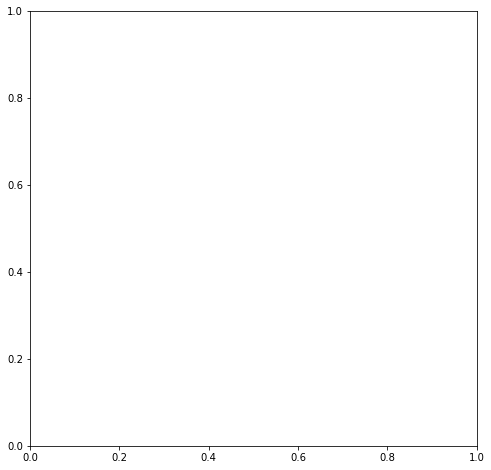

In [23]:
# %matplotlib inline
import matplotlib.pyplot as plt 
flg, ax = plt.subplots(1, 1, figsize=(8,8))